# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


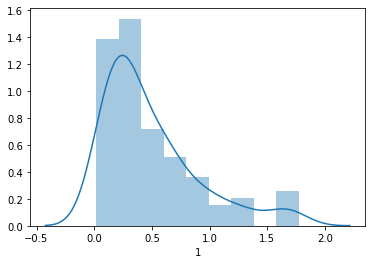

In [2]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)
sns.distplot(data[1])

# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [4]:
lambda_ = lambda x, lamb: lamb*np.exp(-lamb*x)
lambda_1 = lambda_(data[1],1)
lambda_2 = lambda_(data[1],2)
log_like_1, log_like_2 = 0, 0 
for i,j in zip(lambda_1,lambda_2):
    log_like_1 += np.log(i)
    log_like_2 += np.log(j)
print("LogLikelihood for lambda=2 - LogLikelihood for lambda=1 = ",log_like_2-log_like_1)

LogLikelihood for lambda=2 - LogLikelihood for lambda=1 =  20.366416970604863


### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [0]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)

Find the parameters required to compute the T statistic

In [0]:
significance = 0.5
mu1,mu2 = np.mean(sample1[1]),np.mean(sample2[1])
sigma1,sigma2 = np.var(sample1[1]),np.var(sample2[1])
n1,n2 = sample1.shape[0],sample2.shape[0]

Find the degrees of freedom to get the critical value

In [6]:
deg_free = np.square(sigma1/n1 + sigma2/n2)/((sigma1/n1)**2/(n1-1)+(sigma2/n2)**2/(n2-1))
print("Degrees of Freedom : ",deg_free)

Degrees of Freedom :  146.69795658507294


Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [7]:
T = (mu1 - mu2)/np.sqrt((sigma1/n1) + (sigma2/n2))
critical_value = st.t.pdf((1-significance)/2,deg_free)
if abs(T) > critical_value:
    print("YES")
else:
     print("NO")   

YES


Plot the distribution of both the samples to visualize

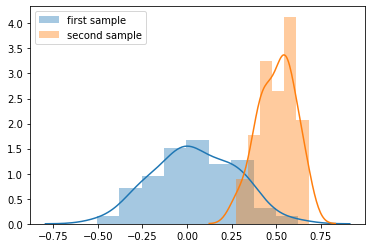

In [8]:
sns.distplot(sample1[1].values)
sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()